<a href="https://colab.research.google.com/github/gotkitsana/data-vi-with-python/blob/main/ann_data_vi_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%config InlineBackend.figure_format = 'svg'

plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams["image.cmap"] = "viridis"
import pandas as pd

In [33]:
# dataset on video game sales and rating from Kaggle Datasets
URL='https://drive.google.com/file/d/1b0vnmcsGry5k7OcPpcPU8PafcAZf3AAt/view?usp=sharing'
path='https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df = pd.read_csv(path).dropna()
df.shape

(6825, 16)

In [5]:
# count null in each column
df = pd.read_csv(path)
df.shape
df.info
df.isnull().sum(axis=0)

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [7]:
df.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E


In [12]:
df["User_Score"] = df["User_Score"].astype("float64")
df["Year_of_Release"] = df["Year_of_Release"].astype("int64")
df["User_Count"] = df["User_Count"].astype("int64")
df["Critic_Count"] = df["Critic_Count"].astype("int64")

In [13]:
useful_cols = [
    "Name",
    "Platform",
    "Year_of_Release",
    "Genre",
    "Global_Sales",
    "Critic_Score",
    "Critic_Count",
    "User_Score",
    "User_Count",
    "Rating"
]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


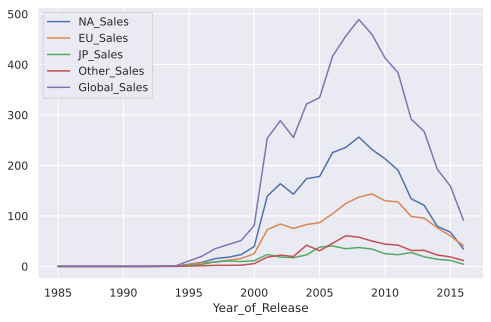

In [17]:
df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby(
    "Year_of_Release"
).sum().plot()

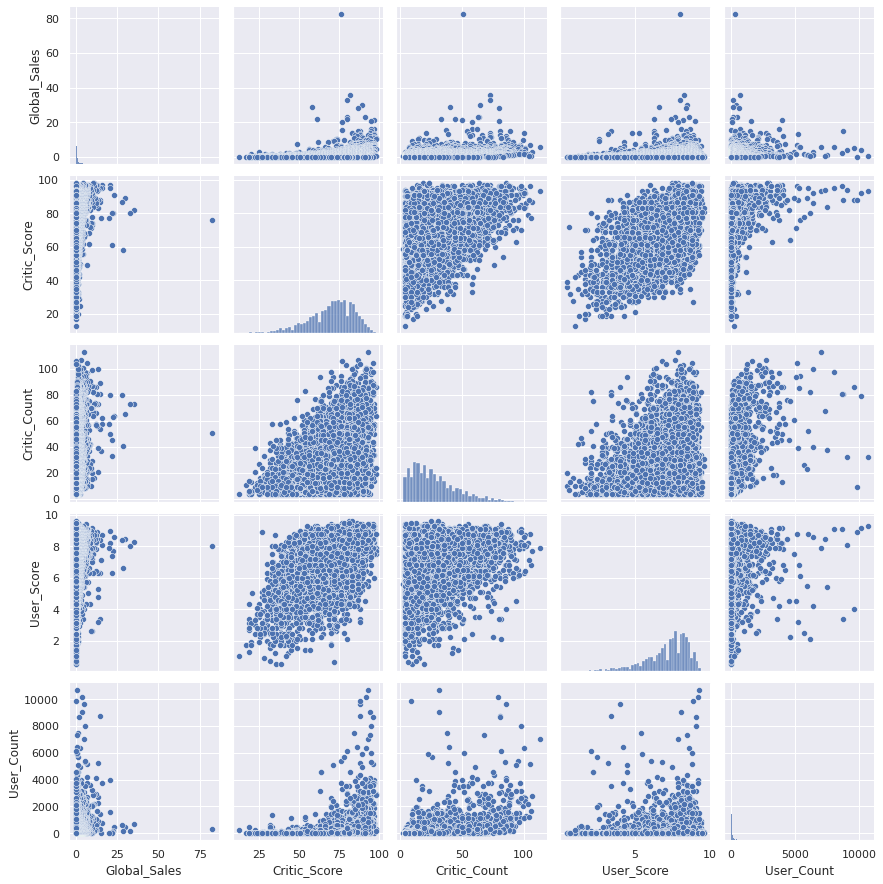

In [19]:
%config InlineBackend.figure_format = "png"
sns.pairplot(df[["Global_Sales","Critic_Score","Critic_Count","User_Score","User_Count"]])

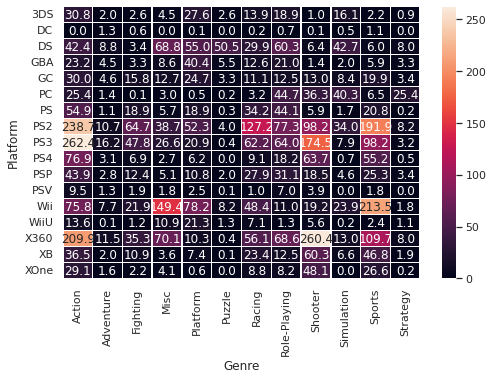

In [20]:

platform_genre_sales = (
    df.pivot_table(
        index="Platform", columns="Genre", values="Global_Sales", aggfunc=sum
    )
    .fillna(0)
    .applymap(float)
)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=0.5)

In [28]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

init_notebook_mode(connected=True)


In [29]:
years_df = (
    df.groupby("Year_of_Release")[["Global_Sales"]]
    .sum()
    .join(df.groupby("Year_of_Release")[["Name"]].count())
)
years_df.columns = ["Global_Sales", "Number_of_Games"]

In [30]:
years_df

,Global_Sales,Number_of_Games
Year_of_Release,,
1985,0.03,1
1988,0.03,1
1992,0.03,1
1994,1.27,1
1996,20.10,7
1997,35.01,13
1998,43.18,25
1999,51.17,30
2000,81.24,102


In [42]:
trace0 = go.Scatter(x=years_df.index, y=years_df['Global_Sales'], name="Global Sales")

trace1 = go.Scatter(x=years_df.index, y=years_df['Number_of_Games'], name="Number_of_Games released")

data = [trace0,trace1]
layout = {"title":"Statistics for video games"}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [37]:
import plotly.express as px
fig = px.line(years_df, x=years_df.index, y=["Global_Sales","Number_of_Games"], title="Statistics for video games")
fig.show()

In [38]:
plotly.offline.plot(fig, filename="Years_stats.html", show_link=False)

'Years_stats.html'

In [40]:
platforms_df = (
    df.groupby("Platform")[["Global_Sales"]]
    .sum()
    .join(df.groupby("Platform")[["Name"]].count())
)
platforms_df.columns = ["Global_Sales","Number_of_Games"]
platforms_df.sort_values("Global_Sales", ascending=False, inplace=True)

In [43]:
trace0 = go.Bar(x=platforms_df.index, y=platforms_df['Global_Sales'], name="Global Sales")

trace1 = go.Bar(x=platforms_df.index, y=platforms_df['Number_of_Games'], name="Number_of_Games released")

data = [trace0, trace1]
layout = {"title":"Market share by gaming platform"}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [45]:
data = []

for genre in df.Genre.unique():
  data.append(go.Box(y=df[df.Genre == genre].Critic_Score, name=genre))

iplot(data, show_link=False)  